# Problem 1: Text mining case study

Study Chapters 1 through 4 of the NLP Book:  

http://www.nltk.org/book/   

Then answer the questions from these chapters as below.  Use NLTK and Py programming as needed.  

**CHAPTER 1:**	Getting Started with NLTK				    	

Following the example on Page 5-6, Pick a pair of words and compare their usage in two different texts, using the similar() and common_contexts() functions.  Explain your results.

In [1]:
import nltk
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
print("'God' usage in Genesis and Monty Python:",'\n')
text3.similar('god')
print()
text6.similar('god')
print("\nCommon contexts of 'god' and 'love' in Genesis and Monty Python:")
text3.common_contexts(['god','love'])
text6.common_contexts(['god','love'])

'God' usage in Genesis and Monty Python: 

he joseph pharaoh jacob they abraham she isaac sarah him them abram it
me i laban israel judah thee esau

coconut the bristol

Common contexts of 'god' and 'love' in Genesis and Monty Python:
No common contexts were found
('The following word(s) were not found:', 'god love')


##### This is actually a hilarious comparison, given the pythons opinions on deity. Obviously Genesis shows terms that are used often around the word 'god' but Monty Python only shows nonsense words. Perfect.

**CHAPTER 2:**  2.8 Exercises   (Page 74)						
Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?

In [3]:
from nltk.corpus import state_union

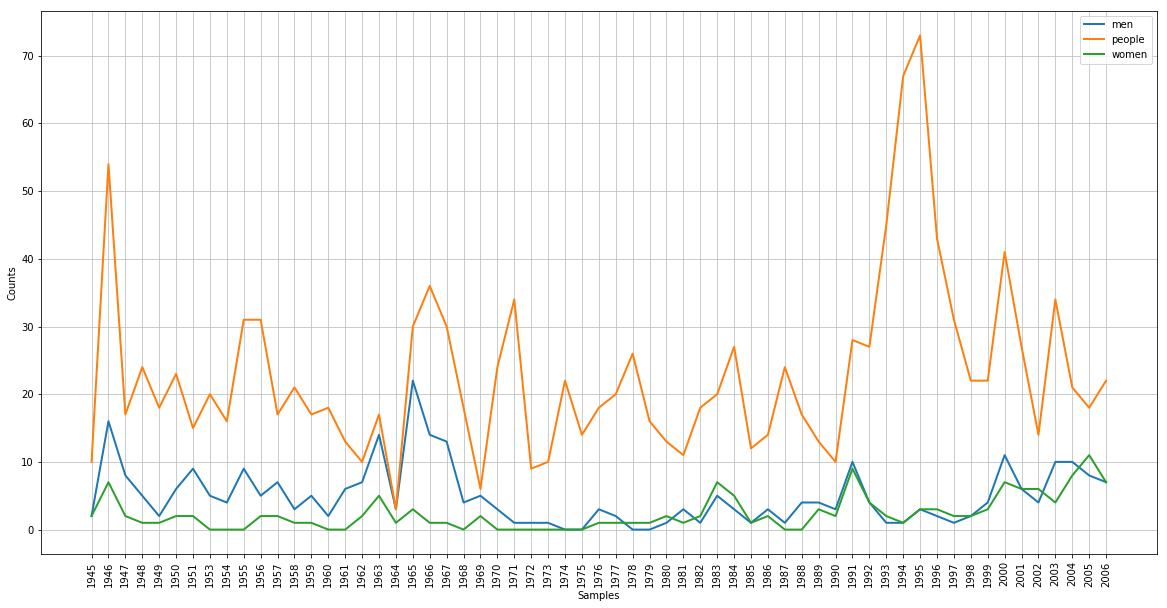

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

cfd = nltk.ConditionalFreqDist((target,fileid[:4])
                              for fileid in state_union.fileids()
                              for w in state_union.words(fileid)
                              for target in ['men','women','people']
                              if w.lower().startswith(target))
cfd.plot()

##### The usage of the words 'men' and 'women' have, since the mid-70s, tracked each other fairly closely. It's interesting to note a sharp increase in the mid-60s of the word 'men'. Perhaps this speaks to the wars of the era, or perhaps LBJ was a bit sexist. It would appear the Bill Clinton was a big fan of the word 'people'.

**CHAPTER 3:**  3.12 Exercises    (Page 124)					
Save some text into a file corpus.txt. Define a function load(f) that reads from the file named in its sole argument, and returns a string containing the text of the file.

Use nltk.regexp_tokenize() to create a tokenizer that tokenizes the following kinds of expressions: monetary amounts; dates; names of people and organizations.

In [5]:
boeing_text = "For a couple of years, AeroAnalysis has been tracking the monthly order inflow for Boeing (BA) and Airbus (OTCPK:EADSF) (OTCPK:EADSY) aircraft. The monthly coverage is not so much there to invoke any Boeing vs. Airbus rhetoric, but it gives us some valuable insights. A single month does not make a trend, but by closely tracking the order and cancellations activity, we always will be a step earlier in detecting trends, and we will have detailed insights into customers' appetite to order and take delivery of aircraft, and we can even track it by type as well as the jet maker's ability to reach any set sales target. Looking at the orders, we can see a combination of willingness to commit with pricing, product, and availability coming together. Special attention will be paid to the mix of single-aisle aircraft and wide-body aircraft, knowing that a single-aisle aircraft costs roughly half or a third of a wide-body aircraft, depending on the model. In this report, we will have a look at the orders and deliveries as well as cancellation activity for Boeing during the month of April. You can read the March report here. What should be kept in mind is that, while this seems to be like a simple summarizing piece, I spend a considerable amount of time to get all data right and present it in a useful way including graphics. Starting in 2019, Boeing has decided to fully recognize the costs and revenues for military derivatives such as the Boeing P-8A Poseidon (based on the Boeing 737) and the Boeing KC-46A (based on the Boeing 767) in the Boeing Defense, Space, and Security segment rather than a partial recognition in the defense arm and a partial recognition in the commercial airplanes arm. We think this gives more clarity on Boeing's commercial business but will continue to add orders and deliveries for military derivatives fully valued in our monthly overview as it gives us a somewhat broader inside in order and delivery values. Next to the monthly values for orders, we also have a tally for cumulated cancellations just like last year, but starting this year, we also will put a value on the cancellations. $85 million"

b = open("corpus.txt","w")
b.write(boeing_text)
b.close()

def load(f):
    txt = open(f,"r")
    return txt.read()

corp = load("corpus.txt")

In [6]:
from nltk.tokenize import RegexpTokenizer
t = RegexpTokenizer('\$\d+')
print('Money in corpus:')
t.tokenize(corp)

Money in corpus:


['$85']

In [13]:
t = RegexpTokenizer('[19|20]\d\d+|January|February|March|April|May|June|July|August|September|October|November|December')
print("Dates in corpus:")
t.tokenize(corp)

Dates in corpus:


['April', 'March', '2019']

In [34]:
tkns = nltk.word_tokenize(corp)
tags = nltk.pos_tag(tkns)
print('Proper nouns (people + orgs):')
[word for word in tags if word[1] == 'NNP']

Proper nouns (people + orgs):


[('AeroAnalysis', 'NNP'),
 ('Boeing', 'NNP'),
 ('BA', 'NNP'),
 ('Airbus', 'NNP'),
 ('OTCPK', 'NNP'),
 ('Boeing', 'NNP'),
 ('Airbus', 'NNP'),
 ('Boeing', 'NNP'),
 ('April', 'NNP'),
 ('March', 'NNP'),
 ('Boeing', 'NNP'),
 ('Boeing', 'NNP'),
 ('P-8A', 'NNP'),
 ('Poseidon', 'NNP'),
 ('Boeing', 'NNP'),
 ('Boeing', 'NNP'),
 ('KC-46A', 'NNP'),
 ('Boeing', 'NNP'),
 ('Boeing', 'NNP'),
 ('Defense', 'NNP'),
 ('Space', 'NNP'),
 ('Security', 'NNP'),
 ('Boeing', 'NNP')]

# Problem 2: Working with text data

In this assignment you will learn how to predict tags for posts from [StackOverflow](https://stackoverflow.com) by using multilabel classification approach.


### Text preprocessing

In [38]:
from nltk.corpus import stopwords

In this assignment, we are using dataset of post titles from StackOverflow. You are provided three sets of files: *train*, *validation* and *test*. All corpora (except for *test*) contain the post's title and corresponding tags (100 tags are available). 

In [39]:
#Import relevant libraries
import pandas as pd
import numpy as np
from ast import literal_eval
from nltk.tokenize import word_tokenize

In [40]:
def read_data(filename):
    data = pd.read_csv(filename, sep='\t')
    data['tags'] = data['tags'].apply(literal_eval)
    return data

In [41]:
train = read_data('train.tsv')
validation = read_data('validation.tsv')
test = pd.read_csv('test.tsv', sep='\t')

In [42]:
train.head()

,title,tags
0,How to draw a stacked dotplot in R?,[r]
1,mysql select all records where a datetime fiel...,"[php, mysql]"
2,How to terminate windows phone 8.1 app,[c#]
3,get current time in a specific country via jquery,"[javascript, jquery]"
4,Configuring Tomcat to Use SSL,[java]


In [43]:
#Split the data into train/val/test
X_train, y_train = train['title'].values, train['tags'].values
X_val, y_val = validation['title'].values, validation['tags'].values
X_test = test['title'].values

One of the major hurdles when working with text data is that it's unstructured and contains many unnecessary/weird tokens. To address this problem, it's usually useful to preprocess and clean the data. In this task you'll write a function, which will be used later. 

**Implement the function *text_processing* following the instructions. Run the function *test_test_processing* afterwards to test it on selected cases.**

In [44]:
#We'll be working with regular expressions to clean the text data
import re

In [55]:
replace_re_by_space = re.compile('[/(){}\[\]\|@,;]')
delete_re_symbols = re.compile('[^0-9a-z #+_]')
stop_words =  set(stopwords.words('english'))


def text_processing(text):
    """
        Input text: string
        
        Output: modified text based on RE
    """
    text = str.lower(text)
    text = re.sub(replace_re_by_space," ",text) # add a function that remove all symbols in replace_re_by_space symbols and replace them by space in text
    text = re.sub(delete_re_symbols,"",text) # add function that simply remove all symbols in delete_re_symbols from text
    token_word=word_tokenize(text)
    filtered_sentence = [w for w in token_word if not w in stop_words] # filtered_sentence contain all words that are not in stopwords dictionary
    lenght_of_string=len(filtered_sentence)
    text_new=""
    for w in filtered_sentence:
        if w!=filtered_sentence[lenght_of_string-1]:
             text_new=text_new+w+" " # when w is not the last word so separate by whitespace
        else:
            text_new=text_new+w
    text = text_new# remove stopwords from text, nothing to do here
    return text

In [57]:
def text_processing_test():
    examples = ["SQL Server - any equivalent of Excel's CHOOSE function?",
                "How to free c++ memory vector<int> * arr?"]
    answers = ["sql server equivalent excels choose function", 
               "free c++ memory vectorint arr"]
    for ex, ans in zip(examples, answers):
        if text_processing(ex) != ans:
            return "Wrong answer for the case: '%s'" % ex
    return "CONGRATS! ALL TESTS PASSED!"

In [58]:
#This should not throw an exception
print(text_processing_test())

CONGRATS! ALL TESTS PASSED!


We can now use our function *text_processing* on the data to clean the titles.

In [59]:
X_train = [text_processing(x) for x in X_train]
X_val = [text_processing(x) for x in X_val]
X_test = [text_processing(x) for x in X_test]

In [60]:
X_train[:3]

['draw stacked dotplot r',
 'mysql select records datetime field less specified value',
 'terminate windows phone 81 app']

### Convert text to word count vectors with CountVectorizer.

Machine Learning algorithms work with numeric data. There are many ways to transform text data to numeric vectors. In this task you will try to use two of them.

#### Word Counts with CountVectorizer

Create three vectors 

X_train_vectorizer

X_val_vectorizer

X_test_vectorizer

which are bag of words representation of X_train, X_val and X_test

You can use sklearn.feature_extraction.text.CountVectorizer as follow:

Create an instance of the CountVectorizer class.
Call the fit_transform() function in order to learn a vocabulary from a document and encode as a vector.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def count_vectorizer_features(X_train, X_val, X_test):
    """
        X_train, X_val, X_test — samples        
        return TF-IDF vectorized representation of each sample and vocabulary
    """
    # Create TF-IDF vectorizer with proper parameters choice, 
    # add token_pattern= '(\S+)' to the list of parameter,  '(\S+)'  means any non white space
    # Fit the vectorizer on the train set
    # Transform the train, test, and val sets and return the result
    
    '''
    YOUR CODE HERE
    '''
    
    return X_train, X_val, X_test

In [ ]:
#Run this cell
X_train_vectorizer, X_val_vectorizer, X_test_vectorizer = count_vectorizer_features(X_train, X_val, X_test)

#### TF-IDF

The second approach extends the CountVectorizer framework by taking into account total frequencies of words in the corpora. It helps to penalize too frequent words and provide better features space. 

Implement function *tfidf_features* using class [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) from *scikit-learn*. Use *train* corpus to train a vectorizer. Don't forget to take a look into the arguments that you can pass to it. We suggest that you filter out too rare words (occur less than in 5 titles) and too frequent words (occur more than in 90% of the titles). Also, use bigrams along with unigrams in your vocabulary. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def tfidf_features(X_train, X_val, X_test):
    """
        X_train, X_val, X_test — samples        
        return TF-IDF vectorized representation of each sample and vocabulary
    """
    # Create TF-IDF vectorizer with proper parameters choice, 
    # add token_pattern= '(\S+)' to the list of parameter,  '(\S+)'  means any non white space
    # Fit the vectorizer on the train set
    # Transform the train, test, and val sets and return the result
    
    '''
    YOUR CODE HERE
    '''
    
    return X_train, X_val, X_test

In [ ]:
#Run this cell
X_train_tfidf, X_val_tfidf, X_test_tfidf = tfidf_features(X_train, X_val, X_test)

In [ ]:
print('X_test_tfidf ', X_test_tfidf.shape) 
print('X_val_tfidf ',X_val_tfidf.shape)
print('X_val_vectorizer ',X_val_vectorizer.shape)

### MultiLabel classifier

As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose it is convenient to use [MultiLabelBinarizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html) from *sklearn*.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
mlb = MultiLabelBinarizer(classes=sorted(tags_count.keys()))
y_train = mlb.fit_transform(y_train)
y_val = mlb.fit_transform(y_val)

Implement the function *train_classifier* for training a classifier. In this task we suggest to use One-vs-Rest approach, which is implemented in [OneVsRestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) class. In this approach *k* classifiers (= number of tags) are trained. As a basic classifier, use [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time, because a number of classifiers to train is large.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [ ]:
def train_classifier(X_train, y_train):
    """
      X_train, y_train — training data
      
      return: trained classifier
    """
    
    # Create and fit LogisticRegression wraped into OneVsRestClassifier.
        
     '''
    YOUR ONE LINE OF CODE HERE
    '''   
    return model

   

Train the classifiers for different data transformations: **CountVectorizer** and **tf-idf**.

In [ ]:
classifier_vectorizer = train_classifier(X_train_vectorizer, y_train)
classifier_tfidf = train_classifier(X_train_tfidf, y_train)

Now you can create predictions for the data. You will need two types of predictions: labels and scores.

In [ ]:
y_val_predicted_labels_vectorizer = classifier_vectorizer.predict(X_val_vectorizer)
y_val_predicted_scores_vectorizer = classifier_vectorizer.decision_function(X_val_vectorizer)

y_val_predicted_labels_tfidf = classifier_tfidf.predict(X_val_tfidf)
y_val_predicted_scores_tfidf = classifier_tfidf.decision_function(X_val_tfidf)

Now take a look at how classifier, which uses TF-IDF, works for a few examples:

In [ ]:
y_val_pred_inversed = mlb.inverse_transform(y_val_predicted_labels_tfidf)
y_val_inversed = mlb.inverse_transform(y_val)
for i in range(5):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_val[i],
        ','.join(y_val_inversed[i]),
        ','.join(y_val_pred_inversed[i])
    ))

Now, we would need to compare the results of different predictions, e.g. to see whether TF-IDF transformation helps or to try different regularization techniques in logistic regression. For all these experiments, we need to setup evaluation procedure. 

### Evaluation

To evaluate the results we will use several classification metrics:
 - [Accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
 - [F1-score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
 - [Area under ROC-curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
 - [Area under precision-recall curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score) 
 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

Implement the function *print_evaluation_scores* which calculates and prints to stdout:
 - *accuracy*
 - *F1-score macro/micro/weighted*
 - *Precision macro/micro/weighted*

In [ ]:
def print_evaluation_scores(y_val, predicted):
    
    accuracy= #your code here
    f1_score_macro= #your code here
    f1_score_micro= #your code here
    f1_score_weighted= #your code here
    precision_weighted= #your code here
    print(accuracy,f1_score_macro,f1_score_micro,f1_score_weighted,precision_weighted)

In [ ]:
print('CountVectorizer')
print_evaluation_scores(y_val, y_val_predicted_labels_vectorizer)
print('Tfidf')
print_evaluation_scores(y_val, y_val_predicted_labels_tfidf)

You might also want to plot some generalization of the [ROC curve](http://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc) for the case of multi-label classification. Provided function *roc_auc* can make it for you. The input parameters of this function are:
 - true labels
 - decision functions scores
 - number of classes

**Task 4 (MultilabelClassification).** Once we have the evaluation set up, we suggest that you experiment a bit with training your classifiers. 
- compare the quality of the CountVectorizer and TF-IDF approaches and choose one of them.
- for the one you choose, try *L1* and *L2*-regularization techniques in Logistic Regression with different coefficients (e.g. C equal to 0.1, 1, 10, 100).

You also could try other improvements of the preprocessing / model, if you want. 

Print the evaluation scores, did you make any improvement?

In [ ]:
from sklearn.pipeline import make_pipeline

def train_classifier(X_train, y_train):
    """
      X_train, y_train — training data
      
      return: trained classifier
    """
    
    # Create and fit LogisticRegression wraped into OneVsRestClassifier.
        
    '''
    YOUR CODE HERE
    '''
    
    return model

'''
Call the train_classifier model and create predictions for the data. 
You will need two types of predictions: labels and scores.
'''

In [ ]:
print('CountVectorizer model')
print_evaluation_scores(y_val, y_val_predicted_labels_vectorizer)
print('TF-IDF model')
print_evaluation_scores(y_val, y_val_predicted_labels_tfidf)    
